In [23]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
pd.options.display.max_columns = None

# OneHotEncoding

In [2]:
data = pd.read_csv('passengers_satisfaction.csv')
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


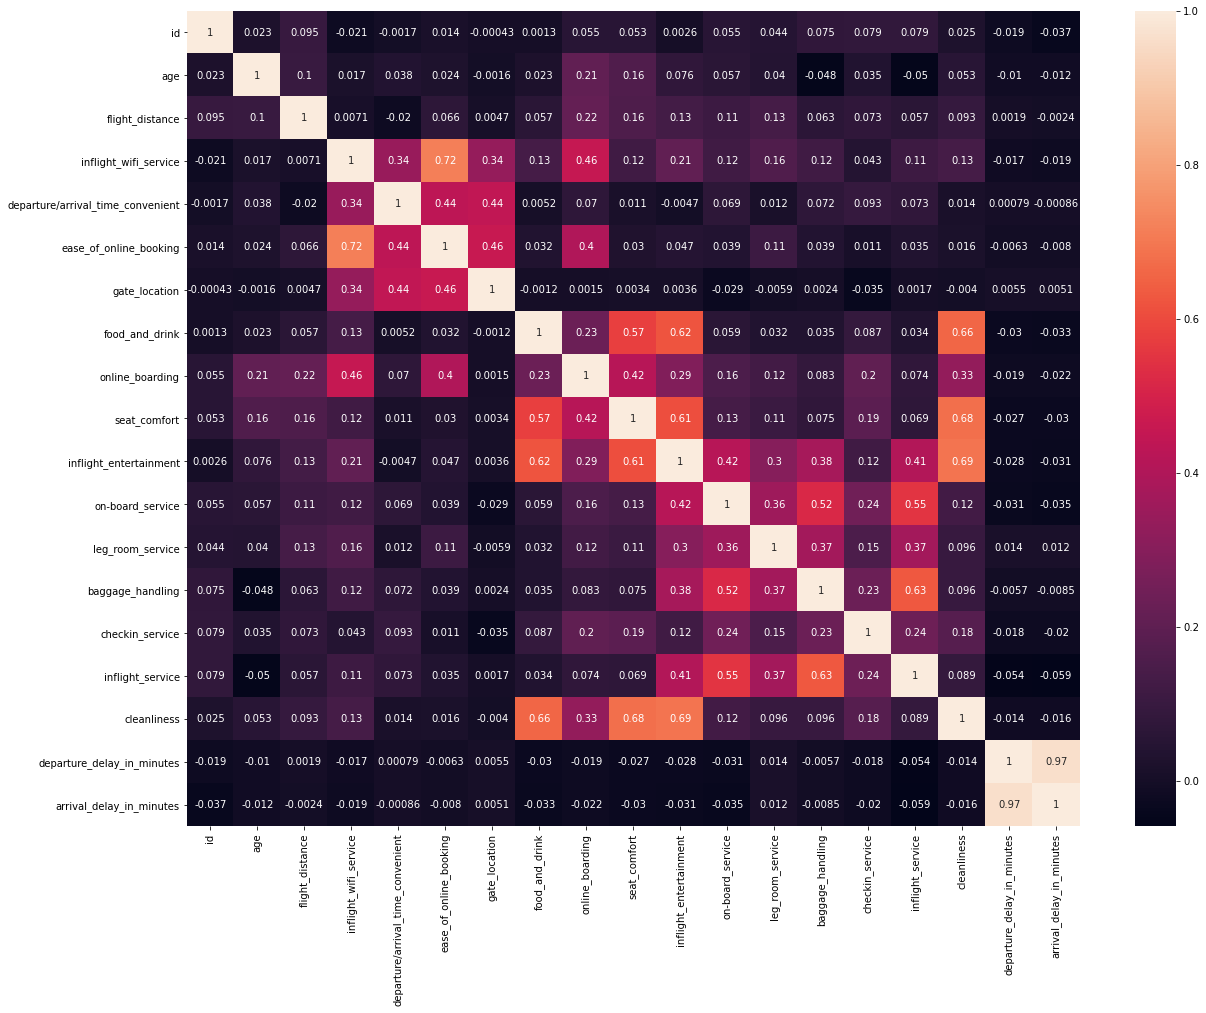

In [3]:
corr_matrix=data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [4]:
##data = data.astype({"inflight_wifi_service": object, "departure/arrival_time_convenient": object, "ease_of_online_booking":object, "gate_location":object, "food_and_drink":object, "online_boarding":object, "seat_comfort":object, "inflight_entertainment":object, "on-board_service":object, "leg_room_service":object, "baggage_handling":object, "checkin_service":object, "inflight_service":object, "cleanliness":object})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   gender                             103594 non-null  object 
 2   customer_type                      103594 non-null  object 
 3   age                                103594 non-null  int64  
 4   type_of_travel                     103594 non-null  object 
 5   class                              103594 non-null  object 
 6   flight_distance                    103594 non-null  int64  
 7   inflight_wifi_service              103594 non-null  int64  
 8   departure/arrival_time_convenient  103594 non-null  int64  
 9   ease_of_online_booking             103594 non-null  int64  
 10  gate_location                      103594 non-null  int64  
 11  food_and_drink                     1035

In [6]:
y = data['satisfaction']
X = data.drop(['satisfaction'], axis=1)

In [7]:
X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = object)

In [8]:
X_cat

,gender,customer_type,type_of_travel,class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103589,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103590,Male,Loyal Customer,Business travel,Business,satisfied
103591,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103592,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [9]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

OneHotEncoder(drop='first')

In [10]:
encoded = encoder.transform(X_cat).toarray()
encoded

array([[1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [11]:
X = np.concatenate([X_num, encoded], axis=1)
X

array([[7.01720e+04, 1.30000e+01, 4.60000e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.04700e+03, 2.50000e+01, 2.35000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.10028e+05, 2.60000e+01, 1.14200e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [6.88250e+04, 3.00000e+01, 1.99500e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [5.41730e+04, 2.20000e+01, 1.00000e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.25670e+04, 2.70000e+01, 1.72300e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

# Logistic Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
classification = LogisticRegression(random_state=42, max_iter=1000)

classification.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
classification.score(X_test, y_test)

0.9181910323857329

In [15]:
predictions = classification.predict(X_test)
predictions

array(['satisfied', 'neutral or dissatisfied', 'neutral or dissatisfied',
       ..., 'satisfied', 'neutral or dissatisfied', 'satisfied'],
      dtype=object)

In [16]:
confusion_matrix(y_test, predictions) 

array([[10761,   894],
       [  801,  8263]])

In [17]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
cf_matrix

array([[0.51937835, 0.0431488 ],
       [0.03866017, 0.39881268]])

<AxesSubplot:>

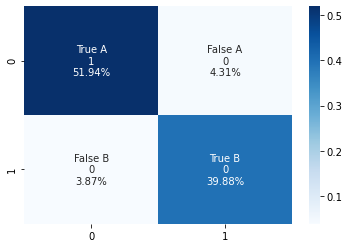

In [18]:
group_names = ['True A', 'False A', 'False B', 'True B']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# Random Forest

Grid Search

In [24]:
param_grid = {
    'n_estimators': [50, 100, 150, 200, 500, 1000],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
#'max_samples' : ['None', 0.5]
    }
clf = RandomForestClassifier(random_state=100)

grid_search = RandomizedSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [33]:
clf = RandomForestClassifier(random_state=0, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=500)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

1.0


In [32]:
clf.fit( X_train, y_train)
X_train
feature_names = X_train.columns
feature_names = list(feature_names)

data = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
data.columns = ['columns_name', 'score_feature_importance']
data.sort_values(by=['score_feature_importance'], ascending = False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'